# Analiza podatkov

In [11]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

df = pd.read_excel("data_cleaned.xlsx")
#df = df.drop(df.columns[5], axis=1)# to je zelo slaba koda
#df = df.drop('Unnamed: 0', axis=1)

In [5]:
#df = df.apply(pd.to_numeric, errors='coerce')

In [12]:
df.head()

,Unnamed: 0,Uspesnost,Ocena,Interakcija_kvantitativno,Interakcija_kvalitativno,Outperforming_partner,Razred,Profesor,Spol,Motivacija,Anksioznost,Introvertiranost,Sensing,Feeling,Judging
0,0,3,4,3,2,3,0,0,0,21,27,26,25,21,23
1,1,2,1,1,2,2,1,2,0,21,29,28,26,24,25
2,2,3,5,3,3,3,2,1,0,35,9,23,27,23,20


In [13]:
X = df.drop("Uspesnost", axis=1)
y = df["Uspesnost"]

In [14]:
from numpy import unique
classes = unique(y)
total = len(y)
for c in classes:
 n_examples = len(y[y==c])
 percent = n_examples / total * 100
 print('> Class=%d : %d/%d (%.1f%%)' % (c, n_examples, total, percent))

> Class=2 : 1/3 (33.3%)
> Class=3 : 2/3 (66.7%)


## Strojno učenje

In [15]:
from sklearn.naive_bayes import GaussianNB

# Build a Gaussian Classifier
model = GaussianNB()

# Model training
model.fit(X, y)                            

GaussianNB()

In [16]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.33, random_state=125
)


from sklearn.metrics import (
    accuracy_score,
    confusion_matrix,
    ConfusionMatrixDisplay,
    f1_score,
)

y_pred = model.predict(X_test)
accuray = accuracy_score(y_pred, y_test)
f1 = f1_score(y_pred, y_test, average="weighted")

print("Accuracy:", accuray)
print("F1 Score:", f1)

Accuracy: 1.0
F1 Score: 1.0


In [24]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.pipeline import make_pipeline
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import cross_val_score
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import MultinomialNB

from sklearn.linear_model import SGDClassifier # Ta bo potreboval tudi pipo s skaliranjem podatkov
from sklearn.preprocessing import StandardScaler
SGDC = make_pipeline(StandardScaler(), SGDClassifier(max_iter=1000, tol=1e-3))

from sklearn.ensemble import GradientBoostingClassifier
import lightgbm
from lightgbm import LGBMClassifier
import xgboost
from xgboost import XGBClassifier

### Accuracy, precision, recall, roc za posamezne modele

In [14]:
#tole mogoce clo dela k bo vecji dataset...

from sklearn.datasets import make_classification
from sklearn.model_selection import cross_validate
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.mixture import GaussianMixture
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier
#from sklearn_crfsuite import CRF
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import numpy as np

# Generate sample data (replace this with your data)
X, y = make_classification(n_samples=1000, n_features=10, n_classes=3, n_clusters_per_class=1, random_state=42)#pazi ce imas ti vec clusterjev.... nekatere metode ne delajo več (glej chatgpt)

# Initialize classifiers
classifiers = [
    GaussianNB(),
    KNeighborsClassifier(),
    DecisionTreeClassifier(),
    GaussianMixture(n_components=3),  # Change n_components for desired states
    LinearDiscriminantAnalysis(),
    AdaBoostClassifier(n_estimators=100),
    GradientBoostingClassifier(n_estimators=100),
    #CRF(),
    XGBClassifier()
]

classifier_names = [
    "Naive Bayes",
    "K-Nearest Neighbors",
    "Decision Tree",
    "Gaussian Mixture",
    "Linear Discriminant Analysis",
    "AdaBoost",
    "Gradient Boosting",
    "Conditional Random Fields",
    "XGBoost"
]

scoring = ['accuracy', 'precision_macro', 'recall_macro', 'f1_macro']

# Training and evaluation loop with cross-validation
for clf, name in zip(classifiers, classifier_names):
    print(name)
    scores = cross_validate(clf, X, y, scoring=scoring, cv=5)
    accuracy = np.mean(scores['test_accuracy'])
    precision = np.mean(scores['test_precision_macro'])
    recall = np.mean(scores['test_recall_macro'])
    f1 = np.mean(scores['test_f1_macro'])
    
    print(f"Accuracy: {accuracy:.2f}")
    print(f"Precision: {precision:.2f}")
    print(f"Recall: {recall:.2f}")
    print(f"F1-score: {f1:.2f}\n")

Naive Bayes
Accuracy: 0.83
Precision: 0.83
Recall: 0.83
F1-score: 0.82

K-Nearest Neighbors
Accuracy: 0.84
Precision: 0.84
Recall: 0.84
F1-score: 0.84

Decision Tree
Accuracy: 0.88
Precision: 0.88
Recall: 0.88
F1-score: 0.88

Gaussian Mixture
Accuracy: 0.23
Precision: 0.22
Recall: 0.23
F1-score: 0.23

Linear Discriminant Analysis
Accuracy: 0.85
Precision: 0.85
Recall: 0.85
F1-score: 0.85

AdaBoost
Accuracy: 0.82
Precision: 0.82
Recall: 0.82
F1-score: 0.82

Gradient Boosting
Accuracy: 0.90
Precision: 0.90
Recall: 0.90
F1-score: 0.90

Conditional Random Fields
Accuracy: 0.90
Precision: 0.90
Recall: 0.90
F1-score: 0.90



### Grafi

Najprej moramo $X$ in $y$ dati v obliko, ki bo pythonu bolj vsec za cross validation

In [12]:
X = pd.DataFrame(X).to_numpy()
y = pd.DataFrame(y).to_numpy()

In [13]:
from operator import add
from functools import reduce

y = [reduce(add, lst) for lst in y]
y = np.array(y)

c:\Users\borbr\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\borbr\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/st

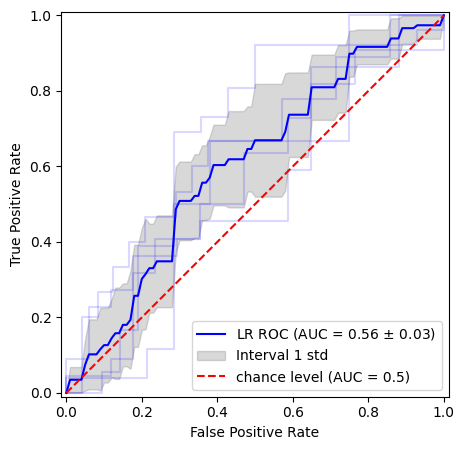

In [14]:
import matplotlib.pyplot as plt
import numpy as np

from sklearn.datasets import make_classification
from sklearn.model_selection import KFold
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve

kf = KFold(5,shuffle=False)

tprs = []
base_fpr = np.linspace(0, 1, 101)

plt.figure(figsize=(5, 5))
plt.axes().set_aspect('equal', 'datalim')

for train, test in kf.split(X):
    model = LogisticRegression().fit(X[train], y[train])
    y_score = model.predict_proba(X[test])
    fpr, tpr, _ = roc_curve(y[test], y_score[:, 1])
    
    plt.plot(fpr, tpr, 'b', alpha=0.15)
    tpr = np.interp(base_fpr, fpr, tpr)
    tpr[0] = 0.0
    tprs.append(tpr)

tprs = np.array(tprs)
mean_tprs = tprs.mean(axis=0)
std = tprs.std(axis=0)

tprs_upper = np.minimum(mean_tprs + std, 1)
tprs_lower = mean_tprs - std


plt.plot(base_fpr, mean_tprs, 'b', 
         label=r"LR ROC (AUC = %0.2f $\pm$ %0.2f)" % (cross_val_score(LogisticRegression(), X, y, scoring="roc_auc", cv=5).mean(),
                                                          cross_val_score(LogisticRegression(), X, y, scoring="roc_auc", cv=5).std()))
plt.fill_between(base_fpr, tprs_lower, tprs_upper, color='grey', alpha=0.3, label="Interval 1 std")

plt.plot([0, 1], [0, 1],'r--', label="chance level (AUC = 0.5)")
plt.xlim([-0.01, 1.01])
plt.ylim([-0.01, 1.01])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc="lower right")
plt.show()

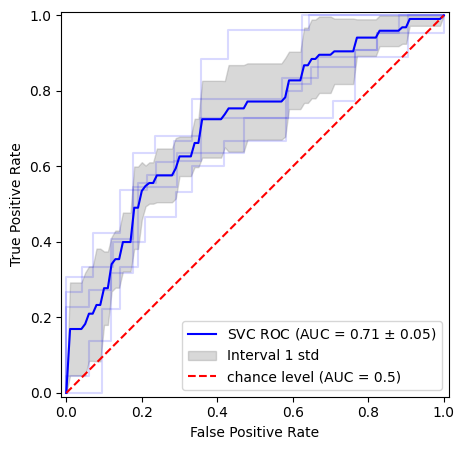

In [15]:
import matplotlib.pyplot as plt
import numpy as np

from sklearn.datasets import make_classification
from sklearn.model_selection import KFold
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve

random.seed(42)

kf = KFold(5,shuffle=False)

tprs = []
base_fpr = np.linspace(0, 1, 101)

plt.figure(figsize=(5, 5))
plt.axes().set_aspect('equal', 'datalim')

for train, test in kf.split(X):
    model = SVC(probability=True).fit(X[train], y[train])
    y_score = model.predict_proba(X[test])
    fpr, tpr, _ = roc_curve(y[test], y_score[:, 1])
    
    plt.plot(fpr, tpr, 'b', alpha=0.15)
    tpr = np.interp(base_fpr, fpr, tpr)
    tpr[0] = 0.0
    tprs.append(tpr)

tprs = np.array(tprs)
mean_tprs = tprs.mean(axis=0)
std = tprs.std(axis=0)

tprs_upper = np.minimum(mean_tprs + std, 1)
tprs_lower = mean_tprs - std


plt.plot(base_fpr, mean_tprs, 'b', 
         label=r"SVC ROC (AUC = %0.2f $\pm$ %0.2f)" % (cross_val_score(SVC(), X, y, scoring="roc_auc", cv=5).mean(),
                                                          cross_val_score(SVC(), X, y, scoring="roc_auc", cv=5).std()))
plt.fill_between(base_fpr, tprs_lower, tprs_upper, color='grey', alpha=0.3, label="Interval 1 std")

plt.plot([0, 1], [0, 1],'r--', label="chance level (AUC = 0.5)")
plt.xlim([-0.01, 1.01])
plt.ylim([-0.01, 1.01])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc="lower right")
plt.show()

### Confusion matrix za porocilo (za zagon preskoci dajanje tabele v drugo obliko v poglavju grafi)

In [9]:
from sklearn.metrics import classification_report, confusion_matrix

#confusion_matrix(y, SVC().fit(X, y).predict(X))
confusion_matrix(y, KNeighborsClassifier().fit(X, y).predict(X))

NameError: name 'KNeighborsClassifier' is not defined